In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.patches import Rectangle,Circle


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 25
import os 


In [89]:
import matplotlib.transforms as transforms

def movie_maker_capsules(folder_name, X, Y, Theta, T0, Tf, BOX_SIZE, ROD_LENGTH=0.6, ROD_WIDTH=0.1,make_ffmpeg_movie=False,Tstart=0,del_pngs=False):
    fig, ax1 = plt.subplots(figsize=(5, 5))
    radius = ROD_WIDTH / 2

    for time in range(T0, Tf):
        ax1.clear()
        Xnow = X[time]
        Ynow = Y[time]
        Thetanow = Theta[time]

        for posx, posy, theta in zip(Xnow, Ynow, Thetanow):
            ux, uy = np.cos(theta), np.sin(theta)

            # Draw rectangle centered at the particle position
            rect_length = ROD_LENGTH - 2 * radius
            rect_center = (posx, posy)

            # Rectangle defined with bottom left at (center - half-length in x and half-width in y)
            rect = Rectangle((-rect_length / 2, -ROD_WIDTH / 2), rect_length, ROD_WIDTH,
                             facecolor='red', edgecolor='none',rotation_point=rect_center)

            # Apply rotation around (posx, posy)
            t = transforms.Affine2D().rotate_around(0, 0, theta).translate(posx, posy) + ax1.transData
            rect.set_transform(t)
            ax1.add_patch(rect)

            # Circular caps
            cap1_x = posx - (ROD_LENGTH / 2) * ux + radius*ux
            cap1_y = posy - (ROD_LENGTH / 2) * uy + radius*uy
            cap2_x = posx + (ROD_LENGTH / 2) * ux -  radius*ux
            cap2_y = posy + (ROD_LENGTH / 2) * uy -  radius*uy

            cap1 = Circle((cap1_x, cap1_y), radius=radius, facecolor='red', edgecolor='none')
            cap2 = Circle((cap2_x, cap2_y), radius=radius, facecolor='red', edgecolor='none')

            ax1.add_patch(cap1)
            ax1.add_patch(cap2)

        ax1.set_title(f'Time {time}', fontsize=12, loc='left')
        ax1.set_xlim(0, BOX_SIZE)
        ax1.set_ylim(0, BOX_SIZE)
        ax1.set_xticks([0, BOX_SIZE])
        # ax1.set_xticklabels([0, BOX_SIZE])
        ax1.set_yticks([])
        ax1.set_xlabel(r'$x$')
        ax1.set_ylabel(r'$y$')
        ax1.set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.savefig(f"{folder_name}/positions_{time:03d}.png", dpi=200, bbox_inches='tight')

    plt.show()
    if make_ffmpeg_movie:
        os.system(f"ffmpeg -y -r 10 -start_number {Tstart:03d} -i '{folder_name}/positions_%03d.png' -vf 'crop=trunc(iw/2)*2:trunc(ih/2)*2'  -pix_fmt yuv420p {folder_name}/movie.mp4")
    if del_pngs:
        os.system(f"rm {folder_name}/positions_*.png")
 
        
    return None

In [13]:
def one_frame(X, Y, Theta, T0, Tf, BOX_SIZE, ROD_LENGTH=0.6, ROD_WIDTH=0.1):
    
    radius = ROD_WIDTH / 2

    for time in range(T0, Tf):
        fig, ax1 = plt.subplots(figsize=(5, 5))
        ax1.clear()
        Xnow = X[time]
        Ynow = Y[time]
        Thetanow = Theta[time]

        for posx, posy, theta in zip(Xnow, Ynow, Thetanow):
            ux, uy = np.cos(theta), np.sin(theta)

            # Draw rectangle centered at the particle position
            rect_length = ROD_LENGTH - 2 * radius
            rect_center = (posx, posy)

            # Rectangle defined with bottom left at (center - half-length in x and half-width in y)
            rect = Rectangle((-rect_length / 2, -ROD_WIDTH / 2), rect_length, ROD_WIDTH,
                             facecolor='red', edgecolor='none',rotation_point=rect_center)

            # Apply rotation around (posx, posy)
            t = transforms.Affine2D().rotate_around(0, 0, theta).translate(posx, posy) + ax1.transData
            rect.set_transform(t)
            ax1.add_patch(rect)

            # Circular caps
            cap1_x = posx - (ROD_LENGTH / 2) * ux + radius*ux
            cap1_y = posy - (ROD_LENGTH / 2) * uy + radius*uy
            cap2_x = posx + (ROD_LENGTH / 2) * ux -  radius*ux
            cap2_y = posy + (ROD_LENGTH / 2) * uy -  radius*uy

            cap1 = Circle((cap1_x, cap1_y), radius=radius, facecolor='red', edgecolor='none')
            cap2 = Circle((cap2_x, cap2_y), radius=radius, facecolor='red', edgecolor='none')

            ax1.add_patch(cap1)
            ax1.add_patch(cap2)

        ax1.set_title(f'Time {time}', fontsize=12, loc='left')
        ax1.set_xlim(0, BOX_SIZE)
        ax1.set_ylim(0, BOX_SIZE)
        ax1.set_xticks([0, BOX_SIZE])
        # ax1.set_xticklabels([0, BOX_SIZE])
        ax1.set_yticks([])
        ax1.set_xlabel(r'$x$')
        ax1.set_ylabel(r'$y$')
        ax1.set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.show()
        

    
    return None

In [4]:
def velocity_calc(X, Y, Dt, BOX_SIZE):
    Steps, N = X.shape
    # compute frame-to-frame shifts with PBC
    dX = X[1:] - X[:-1]
    dY = Y[1:] - Y[:-1]
    # minimal image
    dX = (dX + BOX_SIZE/2) % BOX_SIZE - BOX_SIZE/2
    dY = (dY + BOX_SIZE/2) % BOX_SIZE - BOX_SIZE/2

    Vx = dX / Dt
    Vy = dY / Dt
    V  = np.hypot(Vx, Vy)
    return Vx, Vy, V

def polar_OP(Theta):
    Px = np.mean(np.cos(Theta),axis=1)
    Py = np.mean(np.sin(Theta),axis=1)
    return np.sqrt(Px**2+Py**2),Px,Py

def nematic_OP(Theta):
    Qx = np.mean(np.cos(2*Theta),axis=1)
    Qy = np.mean(np.sin(2*Theta),axis=1)
    return np.sqrt(Qx**2+Qy**2),Qx,Qy

In [90]:
box=20
cutoff=4
Nparticles=200
T=2000
Dt=0.01
rod_length=2
rod_radius=0.2
khardcore=0
kspring=2
rate=0.3
lo=10
kalign= 8

folder_name=f"Dt_{Dt}_Nparticles_{Nparticles}_T_{T}_box_{box}_cutoff_{cutoff}_kalign_{kalign}_khardcore_{khardcore}_kspring_{kspring}_lo_{lo}_rate_{rate}_rod_length_{rod_length}_rod_radius_{rod_radius}"
positions_file = f"{folder_name}/particle_positions_{folder_name}.dat"
squared_disp_file = f"{folder_name}/squared_disp_{folder_name}.dat"

X,Y,Theta_b,Theta_p = np.loadtxt(positions_file, unpack=True)
Steps = len(X)//Nparticles
X = X.reshape((Steps, Nparticles))
Y = Y.reshape((Steps, Nparticles))
Theta_b = Theta_b.reshape((Steps,Nparticles))

Theta_p = Theta_p.reshape((Steps,Nparticles))
Vx,Vy,V = velocity_calc(X,Y,Dt,box)
P,Px,Py = polar_OP(Theta_b)
Q,Qx,Qy = nematic_OP(Theta_b)
Time = np.arange(0,Steps)*Dt
time,sd = np.loadtxt(squared_disp_file,unpack=True)
folder_name

'Dt_0.01_Nparticles_200_T_2000_box_20_cutoff_4_kalign_8_khardcore_0_kspring_2_lo_10_rate_0.3_rod_length_2_rod_radius_0.2'

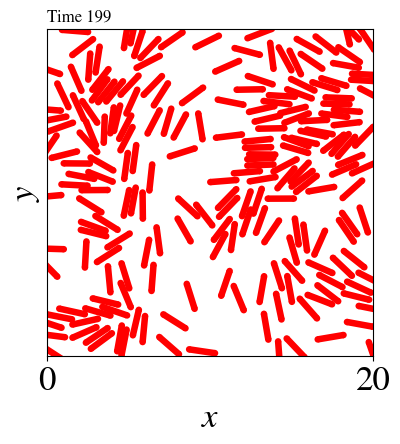

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/concourse/worker/volumes/live/d5b9ea1c-8223-4ff6-7416-83e6b4cd6874/volume/ffmpeg_1587154914508/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilt

In [91]:

movie_maker_capsules(folder_name,X,Y,Theta_b,0,Steps,box,rod_length,2*rod_radius,make_ffmpeg_movie=True,Tstart=0,del_pngs=True)
# ffmpeg -r 5 -start_number 000 -i 'positions_%03d.png' -vf "crop=trunc(iw/2)*2:trunc(ih/2)*2"  -pix_fmt yuv420p movie.mp4


# Mean Squared Displacement

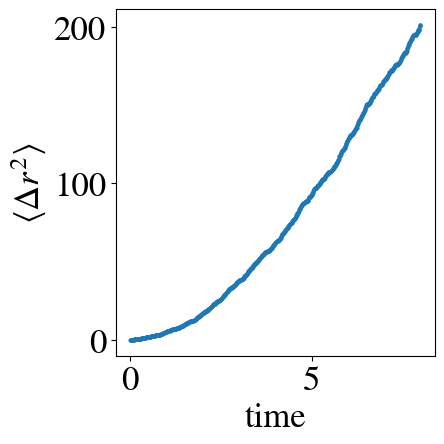

In [16]:

plt.figure(figsize=(5,5),layout='tight')
plt.plot(time,sd,lw=1.5,marker='o',ms=2)
plt.xlabel('time')
plt.ylabel(r'$\langle \Delta r^2 \rangle$')
# plt.xlim(0,0.4)
plt.show()


# Speed

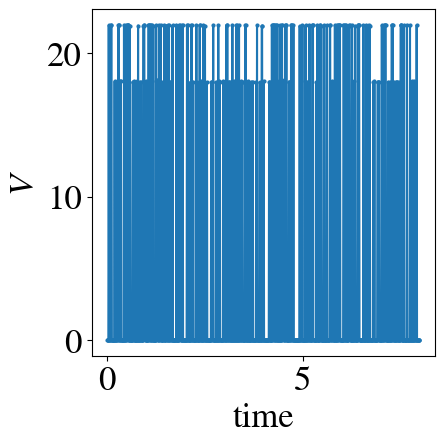

In [230]:
plt.figure(figsize=(5,5),layout='tight')
plt.xlabel('time')
plt.ylabel(r"$V$")
plt.plot(np.arange(0,Steps-1)*Dt,V,lw=1.5,marker='o',ms=2)
plt.show()


## Speed Distribution

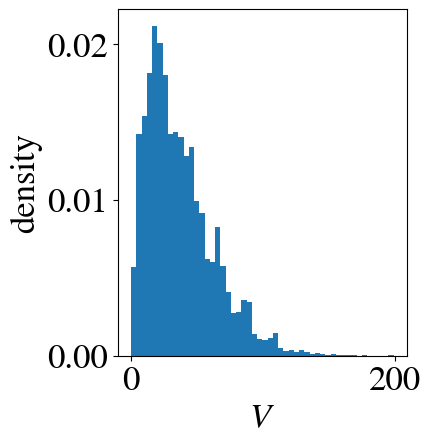

In [98]:
plt.figure(figsize=(5,5),layout = 'tight')
plt.hist(np.hstack(V),bins=50,density=True)
plt.xlabel(r'$V$')
plt.ylabel('density')
plt.show()

# Polar and Nematic Order

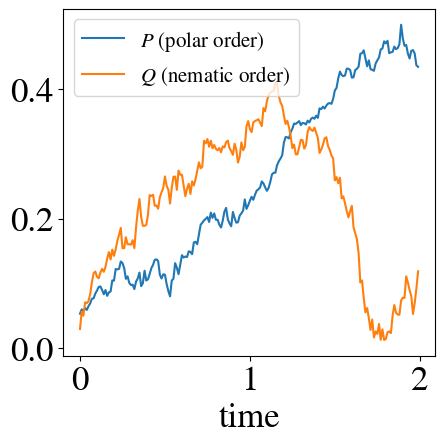

In [75]:
plt.figure(figsize=(5,5),layout='tight')
plt.xlabel('time')
# plt.ylabel(r"$P$")
plt.plot(Time,P,label=r'$P$ (polar order)',lw=1.5)
plt.plot(Time,Q,label=r'$Q$ (nematic order)',lw=1.5)
plt.legend(fontsize=15)
plt.show()

# Local fields

In [43]:
def compute_local_fields(X, Y, Theta, BOX_SIZE, nbins):
    """
    X, Y, Theta : 1D arrays of length N_particles
    BOX_SIZE     : box side length (assumed square [0,BOX_SIZE]^2)
    nbins        : number of bins per dimension
    
    Returns: 
      rho  : (nbins,nbins) density
      pol  : (nbins,nbins) polar order magnitude
      nem  : (nbins,nbins) nematic order magnitude
      xedges, yedges : bin edges for plotting
    """
    N = X.size
    # bin edges
    xedges = np.linspace(0, BOX_SIZE, nbins+1)
    yedges = np.linspace(0, BOX_SIZE, nbins+1)
    dx = BOX_SIZE/nbins
    
    # 1) density
    counts, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges])
    rho = counts / (dx*dx)  # if you want #/area
    
    # 2) polar sums
    c1, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges], weights=np.cos(Theta))
    s1, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges], weights=np.sin(Theta))
    # normalize by counts (avoid division by zero)
    with np.errstate(invalid='ignore', divide='ignore'):
        pol = np.sqrt(c1**2 + s1**2) / counts
    
    # 3) nematic sums (2θ)
    c2, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges], weights=np.cos(2*Theta))
    s2, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges], weights=np.sin(2*Theta))
    with np.errstate(invalid='ignore', divide='ignore'):
        nem = np.sqrt(c2**2 + s2**2) / counts
    
    # Wherever counts==0, set fields to NaN for cleaner plotting
    pol[counts==0] = np.nan
    nem[counts==0] = np.nan
    
    return rho, pol, nem, xedges, yedges

def plot_heatmaps(rho, pol, nem, xedges, yedges):
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    fig, axes = plt.subplots(1,3, figsize=(14,4))
    
    
    im0 = axes[0].imshow(rho.T, origin='lower', extent=extent,
                         cmap='viridis')
    axes[0].set_title("Density",fontsize=19)
    fig.colorbar(im0, ax=axes[0])
    
    im1 = axes[1].imshow(pol.T, origin='lower', extent=extent,
                         vmin=0, vmax=1, cmap='Blues')
    axes[1].set_title("Polar order",fontsize=19)
    fig.colorbar(im1, ax=axes[1])
    
    im2 = axes[2].imshow(nem.T, origin='lower', extent=extent,
                         vmin=0, vmax=1, cmap='Blues')
    axes[2].set_title("Nematic order",fontsize=19)
    fig.colorbar(im2, ax=axes[2])
    
    for ax in axes:
        ax.set_xlabel('x'); ax.set_ylabel('y')
    plt.tight_layout()
    plt.show()

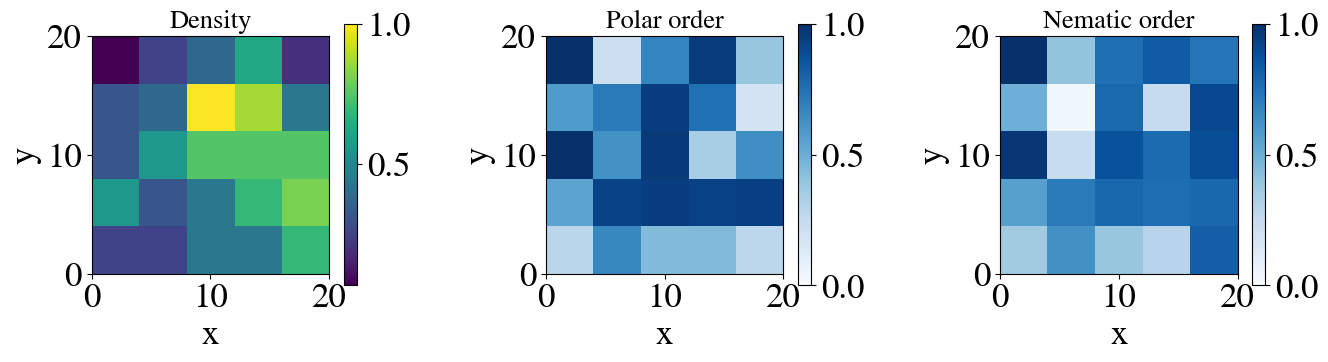

In [92]:
time = 150
Xnow = X[time]
Ynow = Y[time]
Theta_bnow = Theta_b[time]
BOX_SIZE = box
nbins = 5
rho, pol, nem, xedges, yedges = compute_local_fields(Xnow,Ynow,Theta_bnow,BOX_SIZE,nbins)
plot_heatmaps(rho, pol, nem, xedges, yedges)

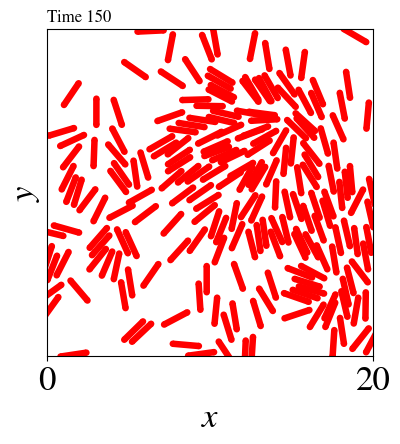

In [88]:
one_frame(X,Y,Theta_b,time,time+1,box,rod_length,2*rod_radius)